# Flight Ticket Price Prediction

### Importing libraries

In [391]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime

### Importing dataset

In [392]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [393]:
dataset = pd.read_excel("/content/drive/MyDrive/PRML/PRML_Bonous_Project/Dataset.xlsx")
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [394]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Taking care of missing values

In [395]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [396]:
dataset = dataset.dropna(axis = 0)

In [397]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Data Visualization

### Price distribution across the dataset

(array([6.028e+03, 4.390e+03, 1.820e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <a list of 10 Patch objects>)

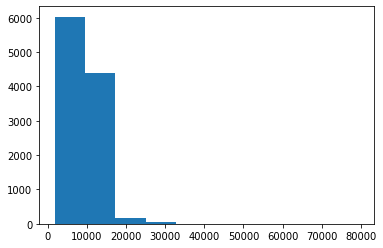

In [398]:
plt.hist(dataset["Price"])

### Airline vs Price Analysis

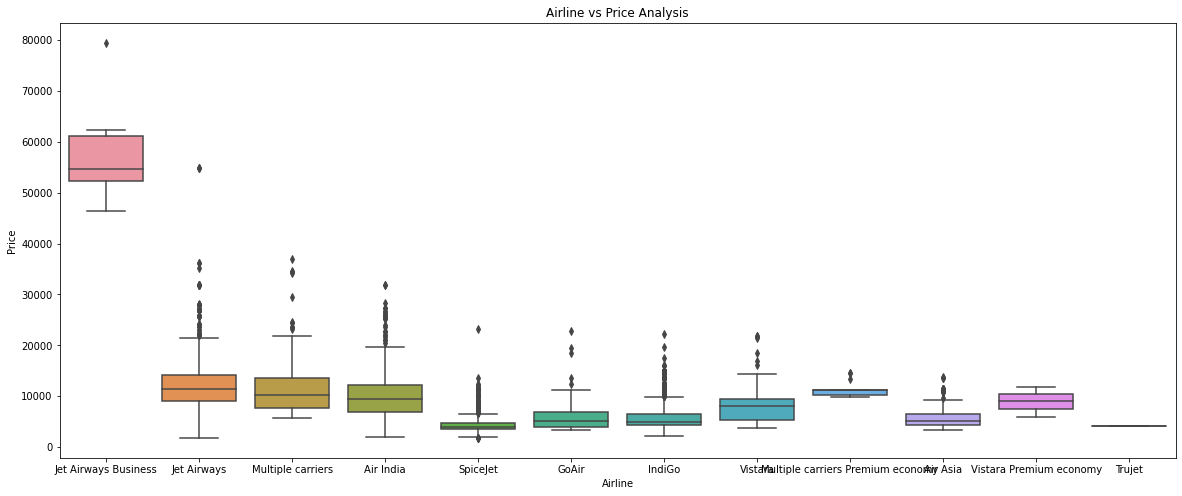

In [399]:
plt.figure(figsize=(20,8))
plt.title("Airline vs Price Analysis")
sns.boxplot(x='Airline',y='Price',data=dataset.sort_values('Price',ascending=False))

### Total Stops vs Price Analysis

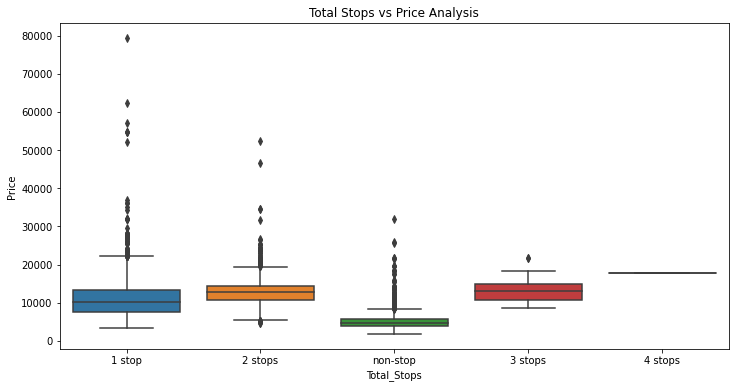

In [400]:
plt.figure(figsize=(12,6))
plt.title("Total Stops vs Price Analysis")
sns.boxplot(x='Total_Stops',y='Price',data=dataset.sort_values('Price',ascending=False))

### Source vs Price Analysis

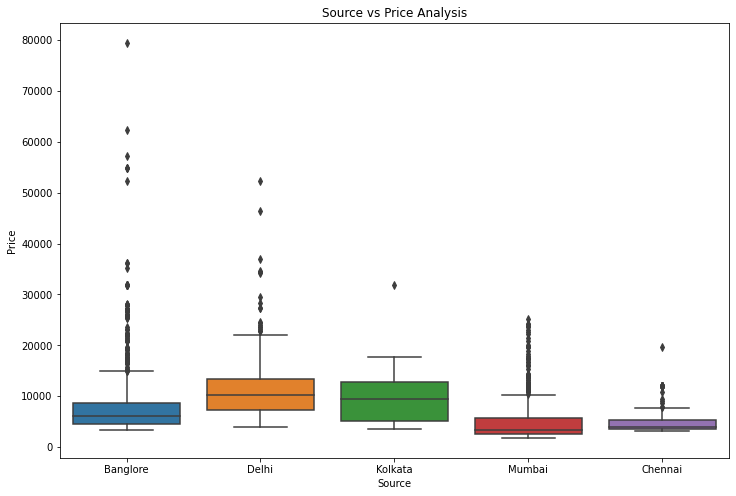

In [401]:
plt.figure(figsize=(12,8))
plt.title("Source vs Price Analysis")
sns.boxplot(x='Source',y='Price',data=dataset.sort_values('Price',ascending=False))

### Destination vs Price Analysis

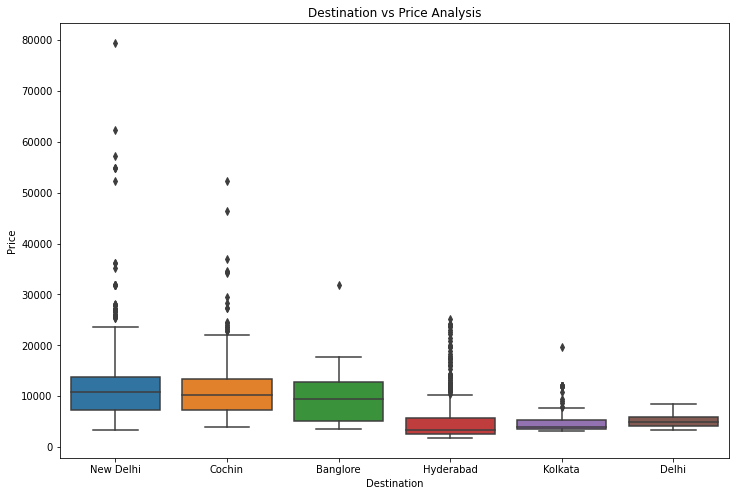

In [402]:
plt.figure(figsize=(12,8))
plt.title("Destination vs Price Analysis")
sns.boxplot(x='Destination',y='Price',data=dataset.sort_values('Price',ascending=False))

### Route vs Price Analysis

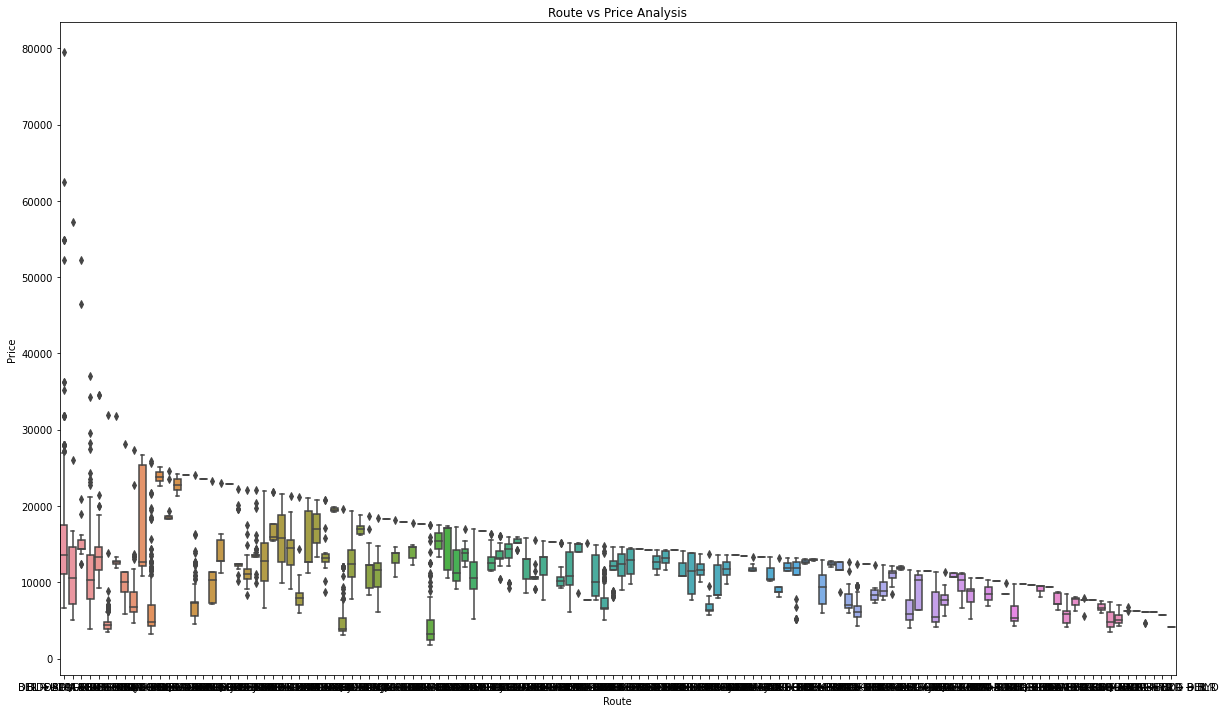

In [403]:
plt.figure(figsize=(20,12))
plt.title("Route vs Price Analysis")
sns.boxplot(x='Route',y='Price',data=dataset.sort_values('Price',ascending=False))

### Distribution of various features across the dataset

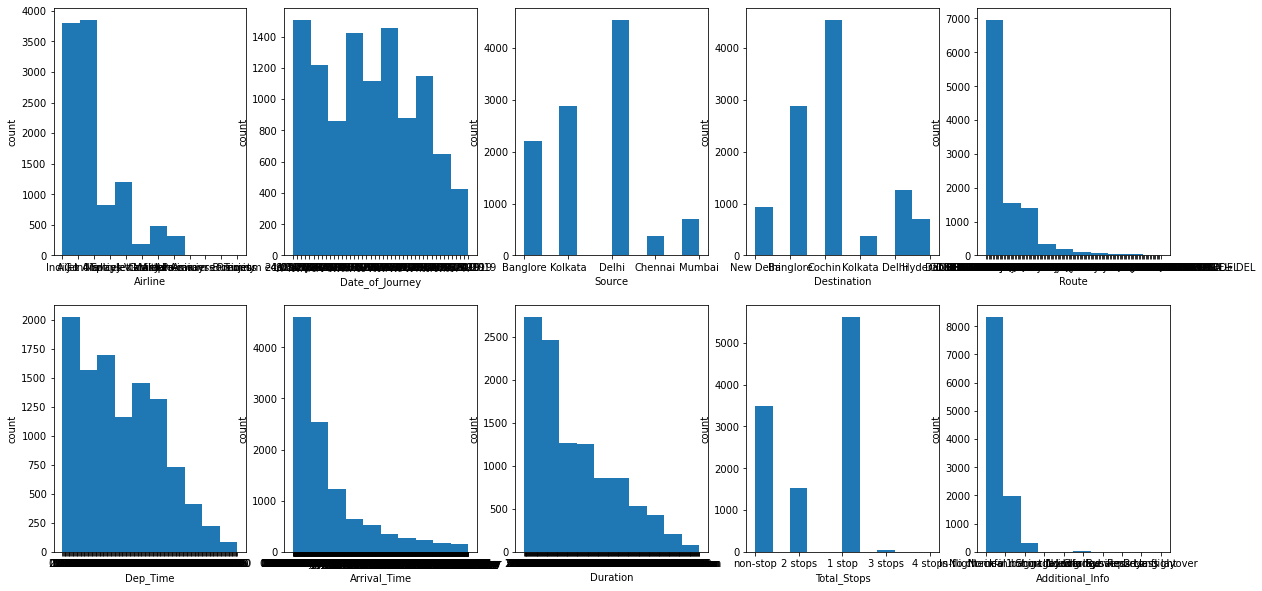

In [404]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
i=0
for column in dataset.columns[:-1]:
    ax = axes[i//5][i%5]
    ax.hist(dataset[column])
    ax.set_xlabel(column)
    ax.set_ylabel("count")
    i+=1
plt.show()

## Data Preprocessing

### Extracting Journey Day and Month from Journey Date

In [405]:
dataset["Journey_Day"] = pd.DatetimeIndex(dataset["Date_of_Journey"]).day
dataset["Journey_Month"] = pd.DatetimeIndex(dataset["Date_of_Journey"]).month
dataset = dataset.drop(["Date_of_Journey"],axis = 1)
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


### Extracting Departure hour and minute from Departure Time

In [406]:
dataset["Dep_hr"] = pd.DatetimeIndex(dataset["Dep_Time"]).hour
dataset["Dep_min"] = pd.DatetimeIndex(dataset["Dep_Time"]).minute
dataset = dataset.drop(["Dep_Time"],axis = 1)
dataset

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,4,9,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,3,1,11,30


### Extracting Arrival hour and minute from Arrival Time

In [407]:
dataset["Arrival_hr"] = pd.DatetimeIndex(dataset["Arrival_Time"]).hour
dataset["Arrival_min"] = pd.DatetimeIndex(dataset["Arrival_Time"]).minute
dataset = dataset.drop(["Arrival_Time"],axis = 1)
dataset

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


### Extracting hours and minutes from Duration of flight

In [408]:
duration = list(dataset["Duration"])

for i in range(len(duration)):
    if 'h' not in duration[i]:                      # Check if duration contains only mins
        duration[i] = "0h " + duration[i]           # Adds 0 hour
    elif 'm' not in duration[i]:                    # Check if duration contains only mins
        duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
    
duration[:10]

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m']

In [409]:
duration_hrs = []
duration_mins = []
for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep = " ")[0][:-1]))                # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = " ")[1][:-1]))   # Extracts only minutes from duration
duration_hrs[:10]

[2, 7, 19, 5, 4, 2, 15, 21, 25, 7]

In [410]:
duration_mins[:10]

[50, 25, 0, 25, 45, 25, 30, 5, 30, 50]

In [411]:
dataset["Duration_hr"] = duration_hrs
dataset["Duration_min"] = duration_mins
dataset = dataset.drop(["Duration"],axis = 1)
dataset

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,1,11,30,14,10,2,40


In [412]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_Day      10682 non-null  int64 
 8   Journey_Month    10682 non-null  int64 
 9   Dep_hr           10682 non-null  int64 
 10  Dep_min          10682 non-null  int64 
 11  Arrival_hr       10682 non-null  int64 
 12  Arrival_min      10682 non-null  int64 
 13  Duration_hr      10682 non-null  int64 
 14  Duration_min     10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


## Encoding categorical features

#### Here I am label enconding the features having few entities while one-Hot enconding those features having many more entities

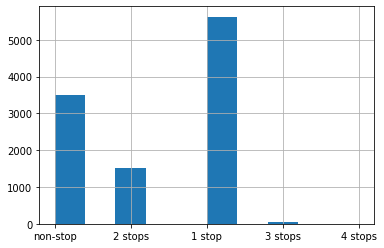

In [413]:
dataset["Total_Stops"].hist()

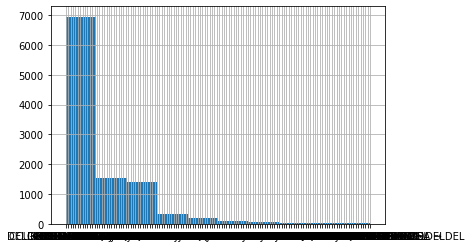

In [414]:
dataset["Route"].hist()

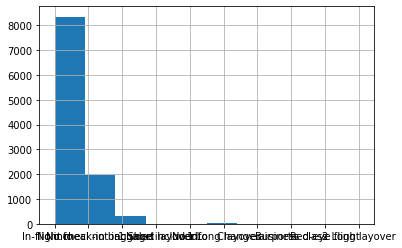

In [415]:
dataset["Additional_Info"].hist()

### Label Encoding Total_Stops, Route, Additional_Info

In [416]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset["Total_Stops"] = label_encoder.fit_transform(dataset["Total_Stops"])
dataset["Route"] = label_encoder.fit_transform(dataset["Route"])
dataset["Additional_Info"] = label_encoder.fit_transform(dataset["Additional_Info"])
dataset

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,18,4,8,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,84,1,8,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,118,1,8,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,91,0,8,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,29,0,8,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,64,4,8,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,64,4,8,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,18,4,8,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,18,4,8,12648,3,1,11,30,14,10,2,40


### One-Hot Encoding Airline

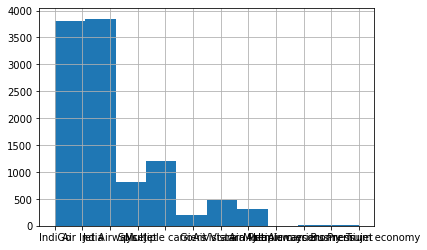

In [417]:
dataset["Airline"].hist()

In [418]:
Airline = dataset[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### One-Hot Encoding Source

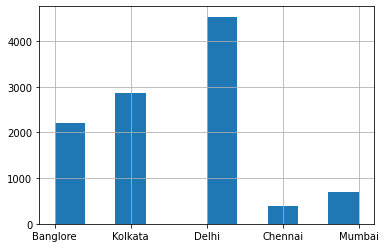

In [419]:
dataset["Source"].hist()

In [420]:
Source = dataset[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### One-Hot Encoding Destination

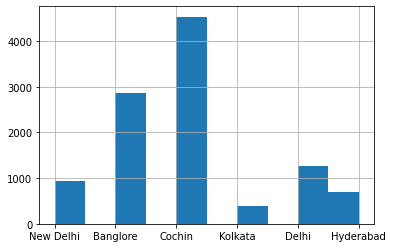

In [421]:
dataset["Destination"].hist()

In [422]:
Destination = dataset[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [423]:
dataset = dataset.drop(["Airline", "Source", "Destination"], axis = 1)
dataset = pd.concat([dataset, Airline, Source, Destination], axis = 1)
dataset

,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,18,4,8,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,84,1,8,7662,5,1,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,118,1,8,13882,6,9,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,91,0,8,6218,5,12,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,29,0,8,13302,3,1,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,64,4,8,4107,4,9,19,55,22,25,...,0,0,0,1,0,0,0,0,0,0
10679,64,4,8,4145,27,4,20,45,23,20,...,0,0,0,1,0,0,0,0,0,0
10680,18,4,8,7229,27,4,8,20,11,20,...,0,0,0,0,0,0,1,0,0,0
10681,18,4,8,12648,3,1,11,30,14,10,...,0,0,0,0,0,0,0,0,0,1


### Tracking and substituting outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


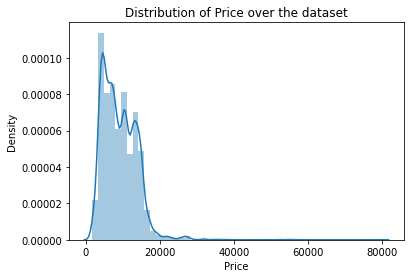

In [424]:
sns.distplot(dataset['Price'])
plt.title("Distribution of Price over the dataset")
plt.show()

In [425]:
dataset['Price'] = np.where(dataset['Price']>=40000,dataset['Price'].median(), dataset['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


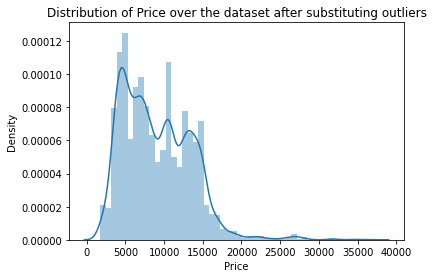

In [426]:
sns.distplot(dataset['Price'])
plt.title("Distribution of Price over the dataset after substituting outliers")
plt.show()

In [427]:
y = dataset["Price"].values
y

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

In [428]:
dataset = dataset.drop(['Price'],axis=1)
dataset

,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,18,4,8,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,84,1,8,5,1,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,118,1,8,6,9,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,91,0,8,5,12,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,29,0,8,3,1,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,64,4,8,4,9,19,55,22,25,2,...,0,0,0,1,0,0,0,0,0,0
10679,64,4,8,27,4,20,45,23,20,2,...,0,0,0,1,0,0,0,0,0,0
10680,18,4,8,27,4,8,20,11,20,3,...,0,0,0,0,0,0,1,0,0,0
10681,18,4,8,3,1,11,30,14,10,2,...,0,0,0,0,0,0,0,0,0,1


### Correlation matrix

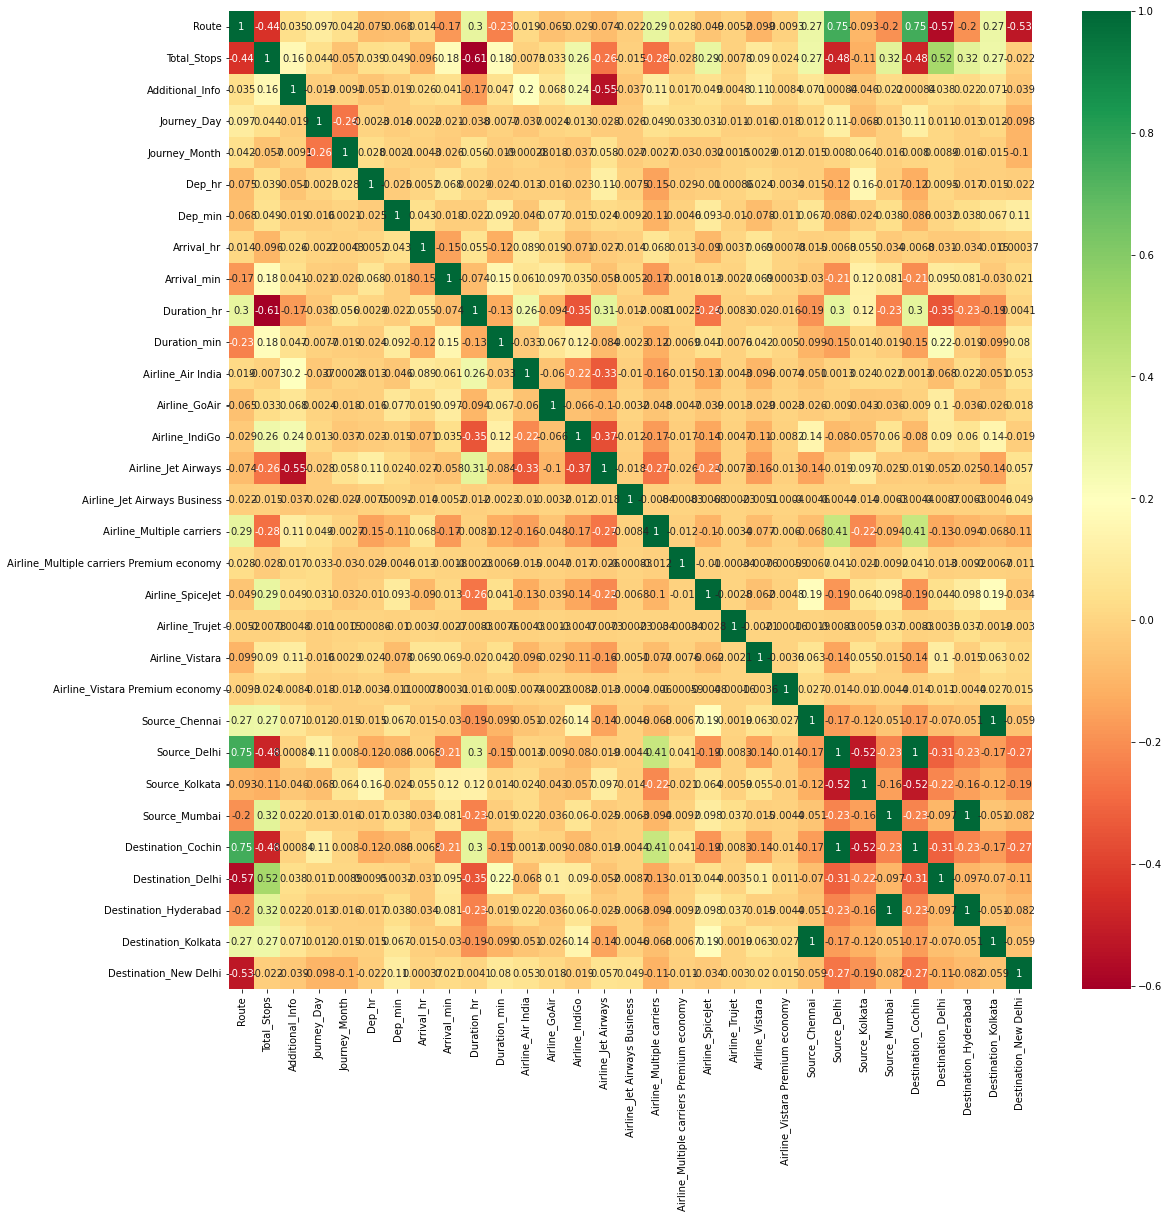

In [429]:
plt.figure(figsize = (18,18))
sns.heatmap(dataset.corr(), annot = True, cmap = "RdYlGn")
plt.show()

## Splitting dataset into training and testing dataset in the ratio of 80:20

In [430]:
x = dataset.iloc[:,:].values

In [431]:
x

array([[ 18,   4,   8, ...,   0,   0,   1],
       [ 84,   1,   8, ...,   0,   0,   0],
       [118,   1,   8, ...,   0,   0,   0],
       ...,
       [ 18,   4,   8, ...,   0,   0,   0],
       [ 18,   4,   8, ...,   0,   0,   1],
       [108,   1,   8, ...,   0,   0,   0]])

In [432]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

## Training Models

In [433]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [434]:
def training_pipeline(model,model_name):
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    print(model_name,":-\n")
    print("Evaluation metrics on Training dataset:-")
    print("r2_score :- ",r2_score(y_train,y_pred_train))
    print("mean squared error (MSE):-", mean_squared_error(y_train,y_pred_train))
    print("root mean squared error (RMSE):-", np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print("mean absolute error (MAE):-", mean_absolute_error(y_train,y_pred_train))

    print()
    print("Evaluation metrics on Testing dataset:-")
    print("r2_score :- ",r2_score(y_test,y_pred_test))
    print("mean squared error (MSE):-", mean_squared_error(y_test,y_pred_test))
    print("root mean squared error (RMSE):-", np.sqrt(mean_squared_error(y_test,y_pred_test)))
    print("mean absolute error (MAE):-", mean_absolute_error(y_test,y_pred_test))

    return model

#### Decision Tree Regressor

In [435]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 42)
training_pipeline(dt_regressor,"DecisionTreeRegressor")

DecisionTreeRegressor :-

Evaluation metrics on Training dataset:-
r2_score :-  0.994996702653313
mean squared error (MSE):- 94759.3166569144
root mean squared error (RMSE):- 307.8300125993474
mean absolute error (MAE):- 42.527052857421495

Evaluation metrics on Testing dataset:-
r2_score :-  0.8803183332160341
mean squared error (MSE):- 2451053.1451801592
root mean squared error (RMSE):- 1565.5839629927739
mean absolute error (MAE):- 636.6300889096865


DecisionTreeRegressor(random_state=42)

#### RandomForestRegressor

In [436]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor = training_pipeline(rf_regressor,"RandomForestRegressor")

RandomForestRegressor :-

Evaluation metrics on Training dataset:-
r2_score :-  0.9836959792601387
mean squared error (MSE):- 308787.9366379096
root mean squared error (RMSE):- 555.6869052244344
mean absolute error (MAE):- 250.65720772102875

Evaluation metrics on Testing dataset:-
r2_score :-  0.9175798978695857
mean squared error (MSE):- 1687944.8288222419
root mean squared error (RMSE):- 1299.2093090885094
mean absolute error (MAE):- 602.6279896550571


#### GradientBoostingRegressor

In [437]:
from sklearn.ensemble import GradientBoostingRegressor
grad_regressor = GradientBoostingRegressor(n_estimators=750, random_state=42)
grad_regressor = training_pipeline(grad_regressor,"GradientBoostingRegressor")

GradientBoostingRegressor :-

Evaluation metrics on Training dataset:-
r2_score :-  0.920083970290578
mean squared error (MSE):- 1513559.5269413493
root mean squared error (RMSE):- 1230.2680711704052
mean absolute error (MAE):- 811.0321147844285

Evaluation metrics on Testing dataset:-
r2_score :-  0.8935453472216222
mean squared error (MSE):- 2180166.9255032614
root mean squared error (RMSE):- 1476.5388330495277
mean absolute error (MAE):- 923.170597250966


#### KNeighborsRegressor

In [438]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()
knn_regressor = training_pipeline(knn_regressor,"KNeighborsRegressor")

KNeighborsRegressor :-

Evaluation metrics on Training dataset:-
r2_score :-  0.8012210038916556
mean squared error (MSE):- 3764749.630450556
root mean squared error (RMSE):- 1940.296273884624
mean absolute error (MAE):- 1243.8616032767698

Evaluation metrics on Testing dataset:-
r2_score :-  0.6992093356202922
mean squared error (MSE):- 6160123.967019186
root mean squared error (RMSE):- 2481.959702940236
mean absolute error (MAE):- 1619.439026672906


#### LightGBM Regressor

In [439]:
import lightgbm

In [440]:
lgbm_regressor = lightgbm.LGBMRegressor()
lgbm_regressor = training_pipeline(lgbm_regressor,"LightGBMRegressor")

LightGBMRegressor :-

Evaluation metrics on Training dataset:-
r2_score :-  0.930327237380417
mean squared error (MSE):- 1319558.4667384967
root mean squared error (RMSE):- 1148.720360548422
mean absolute error (MAE):- 731.92532392017

Evaluation metrics on Testing dataset:-
r2_score :-  0.908122409646397
mean squared error (MSE):- 1881632.0231758596
root mean squared error (RMSE):- 1371.7259285935581
mean absolute error (MAE):- 819.0864937711192


#### Logistic Regression

In [441]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression()
logistic_regressor = training_pipeline(logistic_regressor,"LogisticRegression")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression :-

Evaluation metrics on Training dataset:-
r2_score :-  0.3804773683719499
mean squared error (MSE):- 11733370.44727911
root mean squared error (RMSE):- 3425.4007717753425
mean absolute error (MAE):- 2027.2741954359274

Evaluation metrics on Testing dataset:-
r2_score :-  0.3780268331884108
mean squared error (MSE):- 12737868.11043519
root mean squared error (RMSE):- 3569.0150056332336
mean absolute error (MAE):- 2209.4047730463267


## Hyperparameter Tuning

### RandomForestRegressor

In [442]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(x_train,y_train)
y_pred_train = rf_regressor.predict(x_train)
y_pred_test = rf_regressor.predict(x_test)

print("RandomForestRegressor:-\n")
print("Evaluation metrics on Training dataset:-")
print("r2_score :- ",r2_score(y_train,y_pred_train))
print("mean squared error (MSE):-", mean_squared_error(y_train,y_pred_train))
print("root mean squared error (RMSE):-", np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("mean absolute error (MAE):-", mean_absolute_error(y_train,y_pred_train))

print()
print("Evaluation metrics on Testing dataset:-")
print("r2_score :- ",r2_score(y_test,y_pred_test))
print("mean squared error (MSE):-", mean_squared_error(y_test,y_pred_test))
print("root mean squared error (RMSE):-", np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("mean absolute error (MAE):-", mean_absolute_error(y_test,y_pred_test))

RandomForestRegressor:-

Evaluation metrics on Training dataset:-
r2_score :-  0.9836959792601387
mean squared error (MSE):- 308787.9366379096
root mean squared error (RMSE):- 555.6869052244344
mean absolute error (MAE):- 250.65720772102875

Evaluation metrics on Testing dataset:-
r2_score :-  0.9175798978695857
mean squared error (MSE):- 1687944.8288222419
root mean squared error (RMSE):- 1299.2093090885094
mean absolute error (MAE):- 602.6279896550571


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


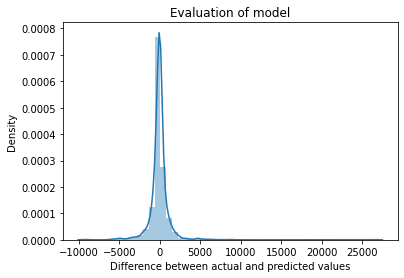

In [443]:
sns.distplot(y_test-y_pred_test)
plt.xlabel("Difference between actual and predicted values")
plt.title("Evaluation of model")
plt.show()

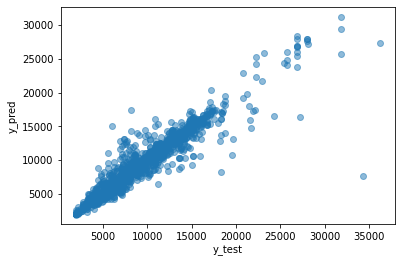

In [444]:
plt.scatter(y_test, y_pred_test, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [445]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [446]:
n_estimators = [int(x) for x in np.arange(100,1201,100)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.arange(5,15,1)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 6, 8]

parameters = {"n_estimators" : n_estimators, 'max_features' : max_features, 'max_depth' : max_depth, "min_samples_split" : min_samples_split, "min_samples_leaf" : min_samples_leaf}

random_regressor = RandomizedSearchCV(estimator = rf_regressor, param_distributions = parameters,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
random_regressor.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=900; total time=   9.9s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=900; total time=   9.7s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=900; total time=   9.8s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=900; total time=   9.8s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=900; total time=   9.9s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=300; total time=   1.2s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=300; total time=   1.2s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=30

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [447]:
random_regressor.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 900}

In [448]:
random_regressor.best_score_

-2224725.8976935367

In [449]:
regressor_optimal = RandomForestRegressor(max_depth=10,max_features='auto',
                                          n_estimators = 900,min_samples_leaf = 2, min_samples_split = 10, random_state = 42)
regressor_optimal.fit(x_train,y_train)
y_pred_optimal = regressor_optimal.predict(x_test)

In [450]:
print("Evaluation metrics on Testing dataset:-")
print("r2_score :- ",r2_score(y_test,y_pred_optimal))
print("mean squared error (MSE):-", mean_squared_error(y_test,y_pred_optimal))
print("root mean squared error (RMSE):-", np.sqrt(mean_squared_error(y_test,y_pred_optimal)))
print("mean absolute error (MAE):-", mean_absolute_error(y_test,y_pred_optimal))

Evaluation metrics on Testing dataset:-
r2_score :-  0.8925175424175865
mean squared error (MSE):- 2201216.1326647075
root mean squared error (RMSE):- 1483.6495990174726
mean absolute error (MAE):- 826.6196036781125


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


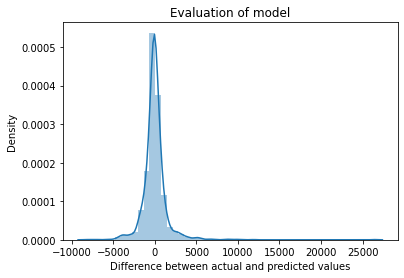

In [451]:
sns.distplot(y_test-y_pred_optimal)
plt.xlabel("Difference between actual and predicted values")
plt.title("Evaluation of model")
plt.show()

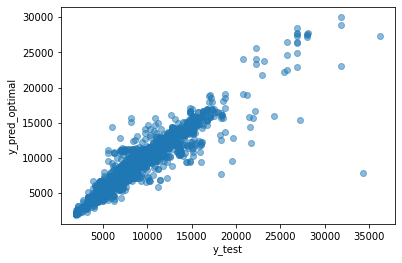

In [452]:
plt.scatter(y_test, y_pred_optimal, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_optimal")
plt.show()

### GradinetBoostingRegressor

In [453]:
from sklearn.ensemble import GradientBoostingRegressor
grad_reg = GradientBoostingRegressor(n_estimators=750, random_state=42 )
grad_reg.fit(x_train,y_train)
y_pred_grad_train = grad_reg.predict(x_train)
y_pred_grad_test = grad_reg.predict(x_test)

In [454]:
print("GradingBoostingRegressor:-\n")
print("Evaluation metrics on Training dataset:-")
print("r2_score :- ",r2_score(y_train,y_pred_grad_train))
print("mean squared error (MSE):-", mean_squared_error(y_train,y_pred_grad_train))
print("root mean squared error (RMSE):-", np.sqrt(mean_squared_error(y_train,y_pred_grad_train)))
print("mean absolute error (MAE):-", mean_absolute_error(y_train,y_pred_grad_train))

print()
print("Evaluation metrics on Testing dataset:-")
print("r2_score :- ",r2_score(y_test,y_pred_grad_test))
print("mean squared error (MSE):-", mean_squared_error(y_test,y_pred_grad_test))
print("root mean squared error (RMSE):-", np.sqrt(mean_squared_error(y_test,y_pred_grad_test)))
print("mean absolute error (MAE):-", mean_absolute_error(y_test,y_pred_grad_test))

GradingBoostingRegressor:-

Evaluation metrics on Training dataset:-
r2_score :-  0.920083970290578
mean squared error (MSE):- 1513559.5269413493
root mean squared error (RMSE):- 1230.2680711704052
mean absolute error (MAE):- 811.0321147844285

Evaluation metrics on Testing dataset:-
r2_score :-  0.8935453472216222
mean squared error (MSE):- 2180166.9255032614
root mean squared error (RMSE):- 1476.5388330495277
mean absolute error (MAE):- 923.170597250966


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


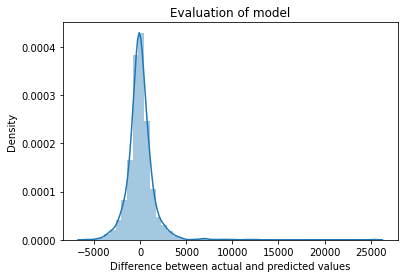

In [455]:
sns.distplot(y_test - y_pred_grad_test)
plt.xlabel("Difference between actual and predicted values")
plt.title("Evaluation of model")
plt.show()

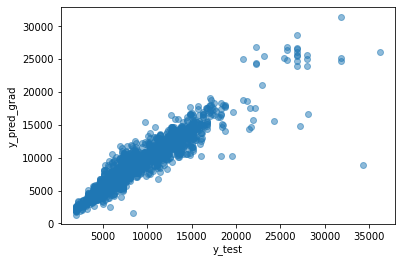

In [456]:
plt.scatter(y_test, y_pred_grad_test, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_grad")
plt.show()

In [457]:
n_estimators = [int(x) for x in np.arange(100,1201,100)]
max_depth = [int(x) for x in np.arange(5,15,1)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 6, 8]

parameters = {"n_estimators" : n_estimators, 'max_features' : max_features, 'max_depth' : max_depth, "min_samples_split" : min_samples_split, "min_samples_leaf" : min_samples_leaf}

random_grad_regressor = RandomizedSearchCV(estimator = grad_reg, param_distributions = parameters,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
random_grad_regressor.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=900; total time=  14.9s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=900; total time=  14.7s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=900; total time=  14.7s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=900; total time=  14.7s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=900; total time=  14.6s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=300; total time=   1.8s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=300; total time=   1.8s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=8, min_samples_split=100, n_estimators=30

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(n_estimators=750,
                                                       random_state=42),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error'

In [458]:
random_grad_regressor.best_params_

{'max_depth': 11,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 100,
 'n_estimators': 500}

In [459]:
random_grad_regressor.best_score_

-1666022.7536843284

In [460]:
grad_optimal_regressor = random_grad_regressor.best_estimator_
y_pred_grad_optimal = grad_optimal_regressor.predict(x_test)

In [461]:
print("Evaluation metrics on Testing dataset:-")
print("r2_score :- ",r2_score(y_test,y_pred_grad_optimal))
print("mean squared error (MSE):-", mean_squared_error(y_test,y_pred_grad_optimal))
print("root mean squared error (RMSE):-", np.sqrt(mean_squared_error(y_test,y_pred_grad_optimal)))
print("mean absolute error (MAE):-", mean_absolute_error(y_test,y_pred_grad_optimal))

Evaluation metrics on Testing dataset:-
r2_score :-  0.9263119035413069
mean squared error (MSE):- 1509115.3510874733
root mean squared error (RMSE):- 1228.4605614701163
mean absolute error (MAE):- 636.4680577782116


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


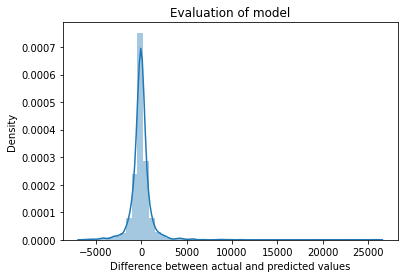

In [462]:
sns.distplot(y_test - y_pred_grad_optimal)
plt.xlabel("Difference between actual and predicted values")
plt.title("Evaluation of model")
plt.show()

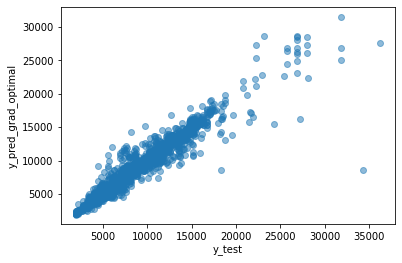

In [463]:
plt.scatter(y_test, y_pred_grad_optimal, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_grad_optimal")
plt.show()